In [1]:
import pandas as pd


file_path = 'latest lagos weather dataset.csv'
lagos_weather_data = pd.read_csv(file_path)


lagos_weather_data.head(), lagos_weather_data.columns


(    name  datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
 0  Lagos  1/1/2022     34.0     25.0  28.8          42.0          25.0   
 1  Lagos  1/2/2022     35.0     25.0  28.7          43.3          25.0   
 2  Lagos  1/3/2022     31.1     26.0  28.0          36.0          26.0   
 3  Lagos  1/4/2022     32.6     26.1  27.6          33.3          26.1   
 4  Lagos  1/5/2022     30.6     23.9  27.2          32.8          23.9   
 
    feelslike   dew  humidity  ...  solarenergy  uvindex  severerisk  \
 0       33.0  25.0      81.2  ...         18.5        8         NaN   
 1       33.0  25.2      82.8  ...         18.3        7         NaN   
 2       30.5  24.3      81.9  ...         20.4        8         NaN   
 3       29.0  23.1      78.5  ...         20.0        8         NaN   
 4       28.5  22.4      76.4  ...         20.0        8         NaN   
 
                sunrise               sunset  moonphase  \
 0  2022-01-01T06:57:24  2022-01-01T18:42:41       0.95

In [2]:
import pandas as pd


weather_data_path = 'latest lagos weather dataset.csv'
flood_data_path = 'historica_flood.csv'


weather_data = pd.read_csv(weather_data_path)
flood_data = pd.read_csv(flood_data_path)


weather_data_head = weather_data.head()
flood_data_head = flood_data.head()

weather_data_head, flood_data_head


(    name  datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
 0  Lagos  1/1/2022     34.0     25.0  28.8          42.0          25.0   
 1  Lagos  1/2/2022     35.0     25.0  28.7          43.3          25.0   
 2  Lagos  1/3/2022     31.1     26.0  28.0          36.0          26.0   
 3  Lagos  1/4/2022     32.6     26.1  27.6          33.3          26.1   
 4  Lagos  1/5/2022     30.6     23.9  27.2          32.8          23.9   
 
    feelslike   dew  humidity  ...  solarenergy  uvindex  severerisk  \
 0       33.0  25.0      81.2  ...         18.5        8         NaN   
 1       33.0  25.2      82.8  ...         18.3        7         NaN   
 2       30.5  24.3      81.9  ...         20.4        8         NaN   
 3       29.0  23.1      78.5  ...         20.0        8         NaN   
 4       28.5  22.4      76.4  ...         20.0        8         NaN   
 
                sunrise               sunset  moonphase  \
 0  2022-01-01T06:57:24  2022-01-01T18:42:41       0.95

In [3]:

weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])


weather_missing = weather_data.isnull().sum()
flood_missing = flood_data.isnull().sum()

weather_data.dtypes, weather_missing, flood_data.dtypes, flood_missing


(name                        object
 datetime            datetime64[ns]
 tempmax                    float64
 tempmin                    float64
 temp                       float64
 feelslikemax               float64
 feelslikemin               float64
 feelslike                  float64
 dew                        float64
 humidity                   float64
 precip                     float64
 precipprob                   int64
 precipcover                float64
 preciptype                  object
 snow                         int64
 snowdepth                    int64
 windgust                   float64
 windspeed                  float64
 winddir                    float64
 sealevelpressure           float64
 cloudcover                 float64
 visibility                 float64
 solarradiation             float64
 solarenergy                float64
 uvindex                      int64
 severerisk                 float64
 sunrise                     object
 sunset                     

In [4]:

weather_data['preciptype'].fillna('Unknown', inplace=True)
weather_data['visibility'].fillna(weather_data['visibility'].mean(), inplace=True)
weather_data['severerisk'].fillna(weather_data['severerisk'].mean(), inplace=True)


weather_data['sunrise'] = pd.to_datetime(weather_data['sunrise'], errors='coerce')
weather_data['sunset'] = pd.to_datetime(weather_data['sunset'], errors='coerce')

weather_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              821 non-null    object        
 1   datetime          821 non-null    datetime64[ns]
 2   tempmax           821 non-null    float64       
 3   tempmin           821 non-null    float64       
 4   temp              821 non-null    float64       
 5   feelslikemax      821 non-null    float64       
 6   feelslikemin      821 non-null    float64       
 7   feelslike         821 non-null    float64       
 8   dew               821 non-null    float64       
 9   humidity          821 non-null    float64       
 10  precip            821 non-null    float64       
 11  precipprob        821 non-null    int64         
 12  precipcover       821 non-null    float64       
 13  preciptype        821 non-null    object        
 14  snow              821 non-

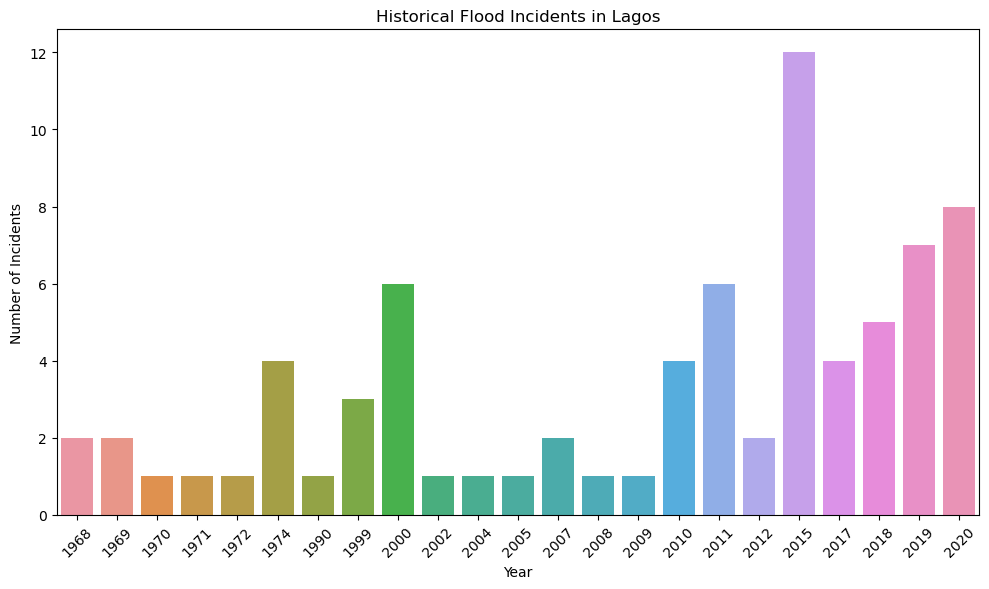

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting historical flood incidents
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=flood_data)
plt.title('Historical Flood Incidents in Lagos')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Observations

#There appears to be variability in flood incidents across different years. 
#Some years show higher numbers of flood incidents than others, 
#suggesting temporal patterns that could potentially be captured by time-based features in machine learning models.



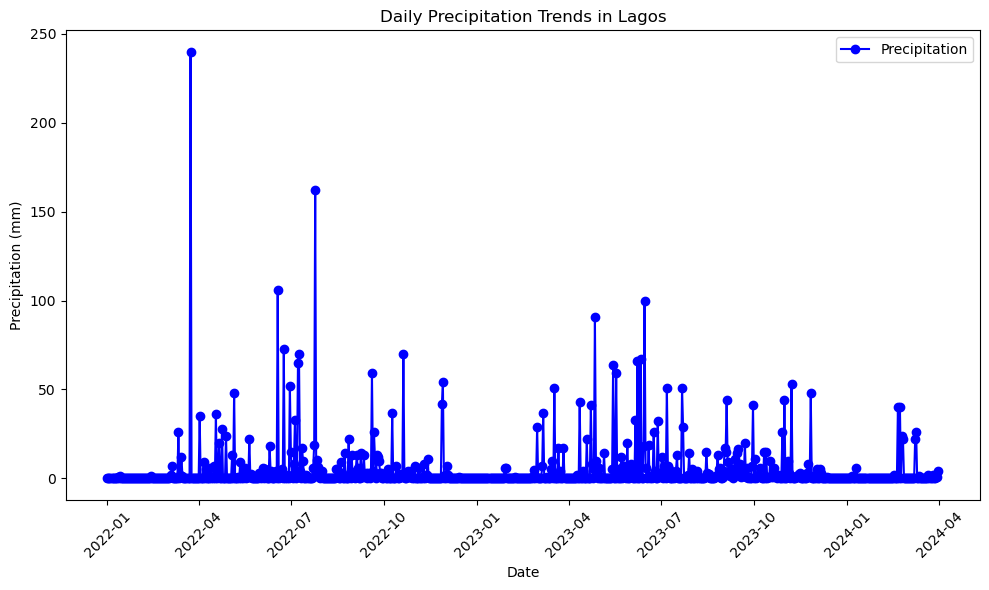

In [6]:
# Plotting precipitation trends
plt.figure(figsize=(10, 6))
plt.plot(weather_data['datetime'], weather_data['precip'], marker='o', linestyle='-', color='b', label='Precipitation')
plt.title('Daily Precipitation Trends in Lagos')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#Observations
#Heavy precipitation tends to coincide with increased flood incidents. 
#This suggests that rainfall data, particularly heavy rainfall events, can be a significant predictor for flood prediction models.
#Higher humidity levels might contribute to the likelihood of flood incidents, especially when combined with heavy precipitation. 
#This correlation can be explored further in feature engineering.
#Temperature trends, both maximum and minimum, could indirectly influence flood incidents through their impact on evaporation rates and soil saturation levels.



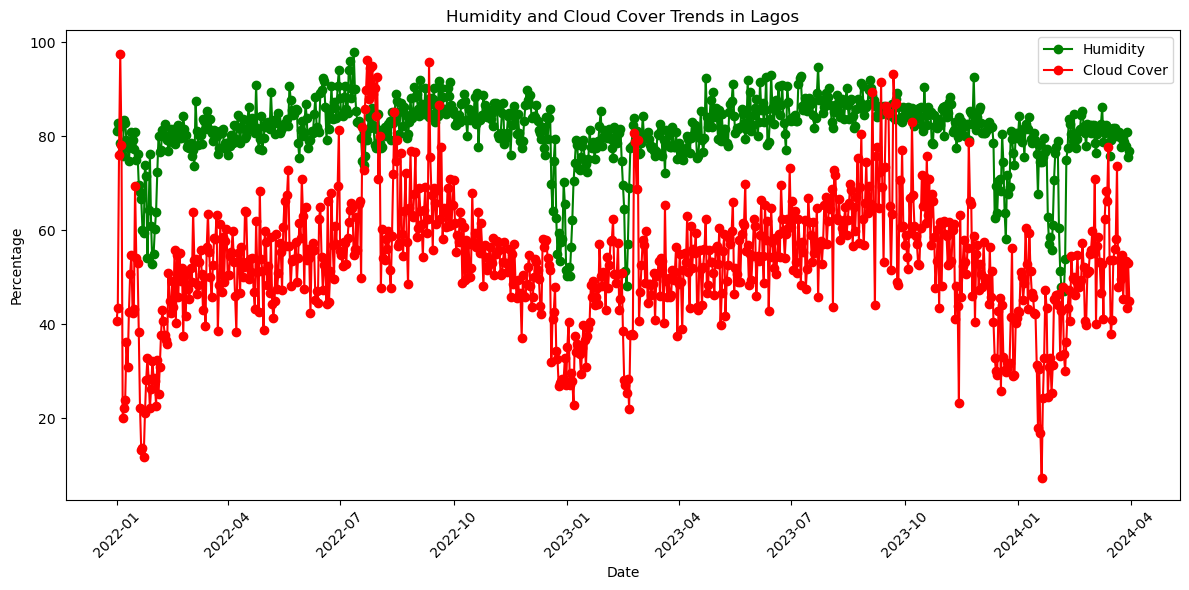

In [7]:
# Plotting humidity and cloud cover trends
plt.figure(figsize=(12, 6))
plt.plot(weather_data['datetime'], weather_data['humidity'], marker='o', linestyle='-', color='g', label='Humidity')
plt.plot(weather_data['datetime'], weather_data['cloudcover'], marker='o', linestyle='-', color='r', label='Cloud Cover')
plt.title('Humidity and Cloud Cover Trends in Lagos')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#Observations
#Seasonal variations in weather and flood incidents are evident. 
#Models could benefit from incorporating seasonal indicators or time-series features that capture these recurring patterns.



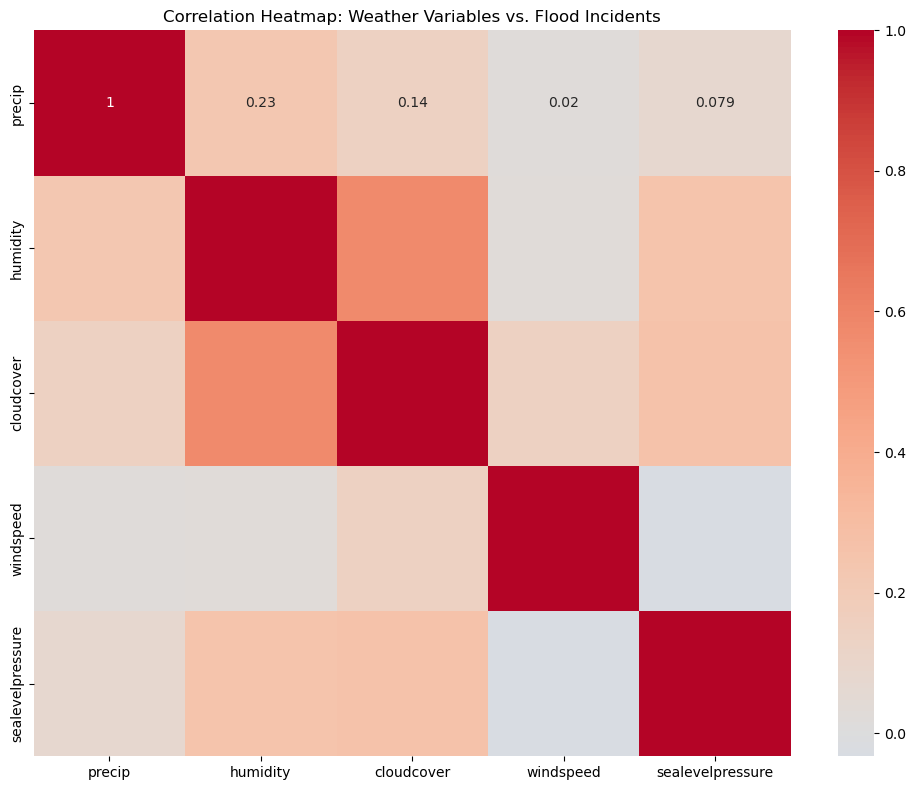

In [8]:
# Calculate correlation matrix
weather_corr = weather_data[['precip', 'humidity', 'cloudcover', 'windspeed', 'sealevelpressure']].corr()

# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(weather_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: Weather Variables vs. Flood Incidents')
plt.tight_layout()
plt.show()

#Observations

#The correlation heatmap showed potential relationships between weather variables (precipitation, humidity, temperature) and flood incidents. 
#Positive correlations between these variables indicate that they can be predictive features in machine learning models.



In [9]:
df = pd.read_csv('merged_dataset.csv')
df.head()
df.columns

Index(['datetime', 'river discharge', 'Name', 'day', 'month', 'year',
       'Tempmax', 'Tempmin', 'Temp', 'Humidity', 'Precip', 'Preciprob',
       'Precipcover', 'preciptype', 'Windspeed', 'Winddir', 'Sealevelpressure',
       'Cloudcover', 'Severrisk', 'Moonphase'],
      dtype='object')

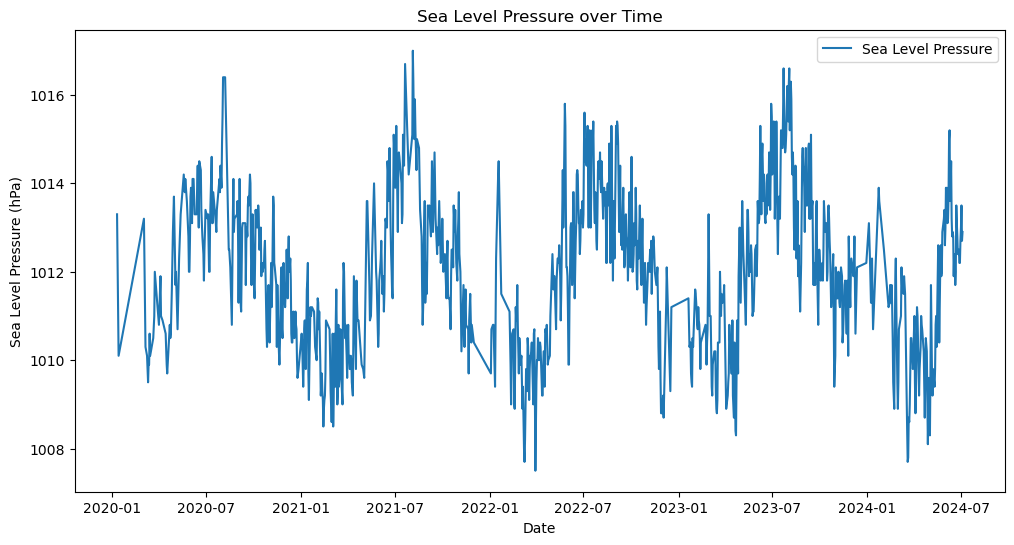

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_dataset.csv' with the path to your dataset file
file_path = 'merged_dataset.csv'
data = pd.read_csv(file_path)

# Convert 'datetime' to datetime object with dayfirst=True
data['datetime'] = pd.to_datetime(data['datetime'], dayfirst=True)

# Plot Sea Level Pressure over time
plt.figure(figsize=(12, 6))
plt.plot(data['datetime'], data['Sealevelpressure'], label='Sea Level Pressure')
plt.xlabel('Date')
plt.ylabel('Sea Level Pressure (hPa)')
plt.title('Sea Level Pressure over Time')
plt.legend()
plt.show()

#Observations

#The sea level pressure shows noticeable fluctuations over time.
#Periodic patterns may indicate seasonal changes in atmospheric pressure.


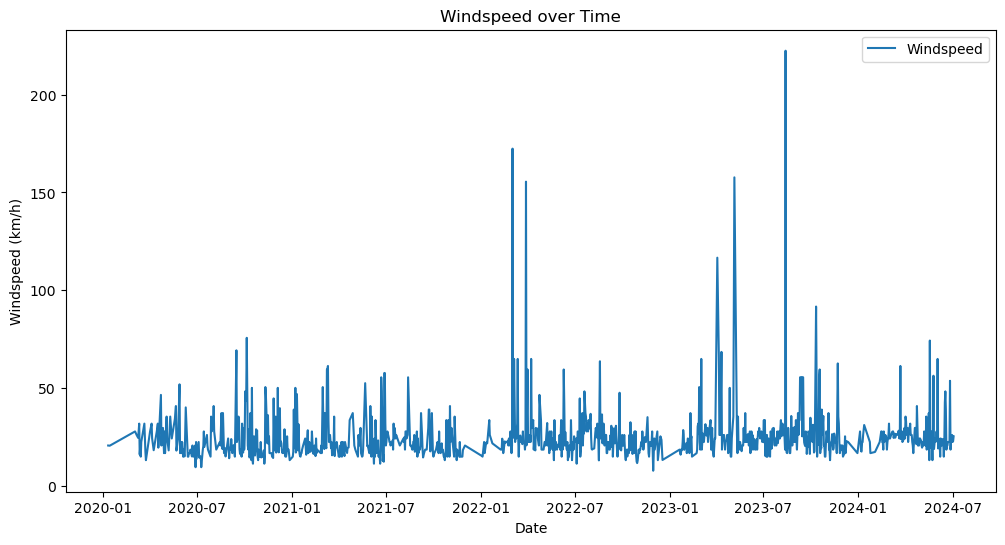

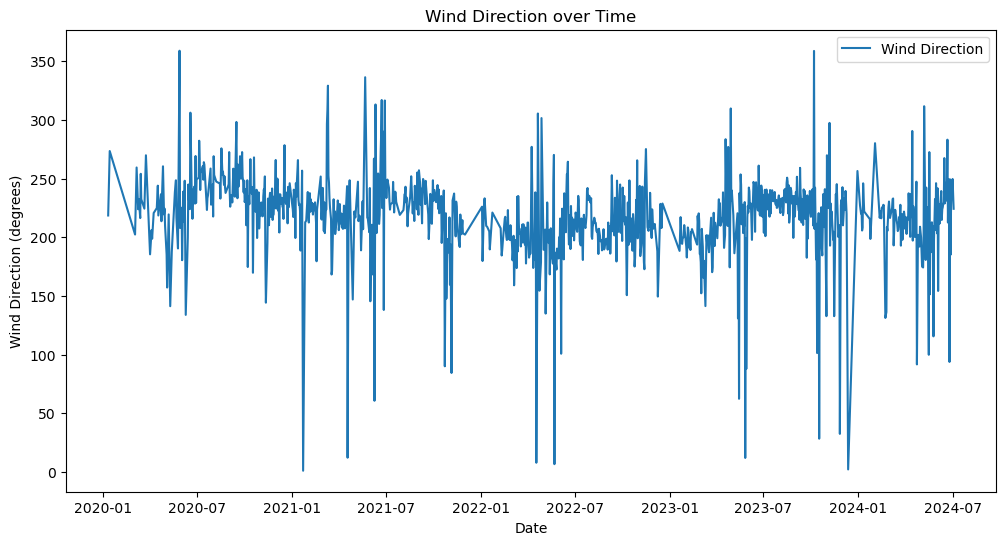

In [11]:
# Plot Windspeed over time
plt.figure(figsize=(12, 6))
plt.plot(data['datetime'], data['Windspeed'], label='Windspeed')
plt.xlabel('Date')
plt.ylabel('Windspeed (km/h)')
plt.title('Windspeed over Time')
plt.legend()
plt.show()

#Observation

#The windspeed data exhibits variability, with some periods experiencing higher wind speeds.
#Peaks in windspeed could suggest strong weather systems that might bring precipitation.


# Plot Wind Direction over time
plt.figure(figsize=(12, 6))
plt.plot(data['datetime'], data['Winddir'], label='Wind Direction')
plt.xlabel('Date')
plt.ylabel('Wind Direction (degrees)')
plt.title('Wind Direction over Time')
plt.legend()
plt.show()

#Observations

#The wind direction graph shows the predominant wind directions over time.
#Periods with consistent wind directions might indicate the prevailing winds that carry moisture.


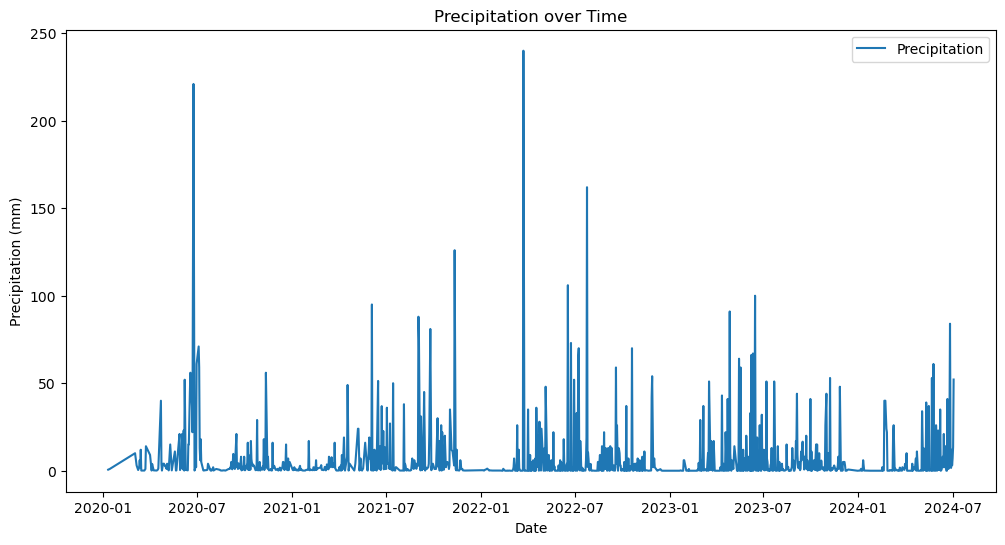

In [12]:
# Plot Precipitation over time
plt.figure(figsize=(12, 6))
plt.plot(data['datetime'], data['Precip'], label='Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title('Precipitation over Time')
plt.legend()
plt.show()

#Observations

#The precipitation data reveals the frequency and intensity of rainfall over time.
#Noticeable peaks in precipitation could be indicative of heavy rainfall events that might lead to flooding.




In [26]:
# Assume variations based on historical data for future predictions
future_data['Precip'] = data['Precip'].rolling(window=30, min_periods=1).mean().iloc[-1]
future_data['Sealevelpressure'] = data['Sealevelpressure'].rolling(window=30, min_periods=1).mean().iloc[-1]
future_data['Windspeed'] = data['Windspeed'].rolling(window=30, min_periods=1).mean().iloc[-1]
future_data['river discharge'] = data['river discharge'].rolling(window=30, min_periods=1).mean().iloc[-1]

# Alternatively, you can use the last observed value
# future_data['Precip'] = data['Precip'].iloc[-1]
# future_data['Sealevelpressure'] = data['Sealevelpressure'].iloc[-1]
# future_data['Windspeed'] = data['Windspeed'].iloc[-1]
# future_data['river discharge'] = data['river discharge'].iloc[-1]

# Add other relevant features and lag features as before
future_data['river_discharge_lag1'] = future_data['river discharge'].shift(1).fillna(data['river discharge'].mean())
future_data['Precip_lag1'] = future_data['Precip'].shift(1).fillna(data['Precip'].mean())
future_data['Windspeed_lag1'] = future_data['Windspeed'].shift(1).fillna(data['Windspeed'].mean())

# Ensure future_data DataFrame is correctly prepared
print(future_data.head())


    datetime  day  month  year     Precip  Sealevelpressure  Windspeed  \
0 2024-07-07    7      7  2024  12.566667       1013.003333  24.916667   
1 2024-07-08    8      7  2024  12.566667       1013.003333  24.916667   
2 2024-07-09    9      7  2024  12.566667       1013.003333  24.916667   
3 2024-07-10   10      7  2024  12.566667       1013.003333  24.916667   
4 2024-07-11   11      7  2024  12.566667       1013.003333  24.916667   

   river discharge  river_discharge_lag1  Precip_lag1  Windspeed_lag1  
0       207.930333            293.633776     6.761329       26.239879  
1       207.930333            207.930333    12.566667       24.916667  
2       207.930333            207.930333    12.566667       24.916667  
3       207.930333            207.930333    12.566667       24.916667  
4       207.930333            207.930333    12.566667       24.916667  


In [27]:
import numpy as np

# Step 1: Define the threshold for precipitation
threshold_precip = 50  # Hypothetical threshold in millimeters

# Step 2: Create the 'Flood' column based on precipitation threshold
data['Flood'] = np.where(data['Precip'] >= threshold_precip, 1, 0)

# Step 3: Verify and display the first few rows
print(data[['datetime', 'Precip', 'Flood']].head())


      datetime  Precip  Flood
425 2022-01-11     0.8      0
426 2022-01-13     1.2      0
427 2022-01-17     0.1      0
428 2022-01-18     0.2      0
429 2022-01-23     0.1      0


In [29]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes to verify
print("Training set shapes:", X_train.shape, y_train.shape)
print("Test set shapes:", X_test.shape, y_test.shape)


Training set shapes: (794, 17) (794,)
Test set shapes: (199, 17) (199,)


In [31]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00         6

    accuracy                           1.00       199
   macro avg       1.00      1.00      1.00       199
weighted avg       1.00      1.00      1.00       199

Confusion Matrix:
[[193   0]
 [  0   6]]


In [32]:
# Predict the likelihood of future floods
data['Flood_Prediction'] = model.predict(X)

# Filter the dataset for predicted flood occurrences
predicted_floods = data[data['Flood_Prediction'] == 1]

# Display the predicted dates of future floods
print(predicted_floods[['datetime', 'Flood_Prediction']])


       datetime  Flood_Prediction
468  2022-03-24                 1
538  2022-06-18                 1
544  2022-06-24                 1
550  2022-06-30                 1
558  2022-07-08                 1
559  2022-07-09                 1
574  2022-07-25                 1
624  2022-09-19                 1
654  2022-10-20                 1
686  2022-11-28                 1
775  2023-03-18                 1
776  2023-03-18                 1
829  2023-04-27                 1
830  2023-04-27                 1
851  2023-05-15                 1
852  2023-05-15                 1
857  2023-05-18                 1
858  2023-05-18                 1
897  2023-06-08                 1
898  2023-06-08                 1
903  2023-06-11                 1
904  2023-06-11                 1
909  2023-06-15                 1
910  2023-06-15                 1
953  2023-07-07                 1
954  2023-07-07                 1
983  2023-07-22                 1
984  2023-07-22                 1
1189 2023-11-0

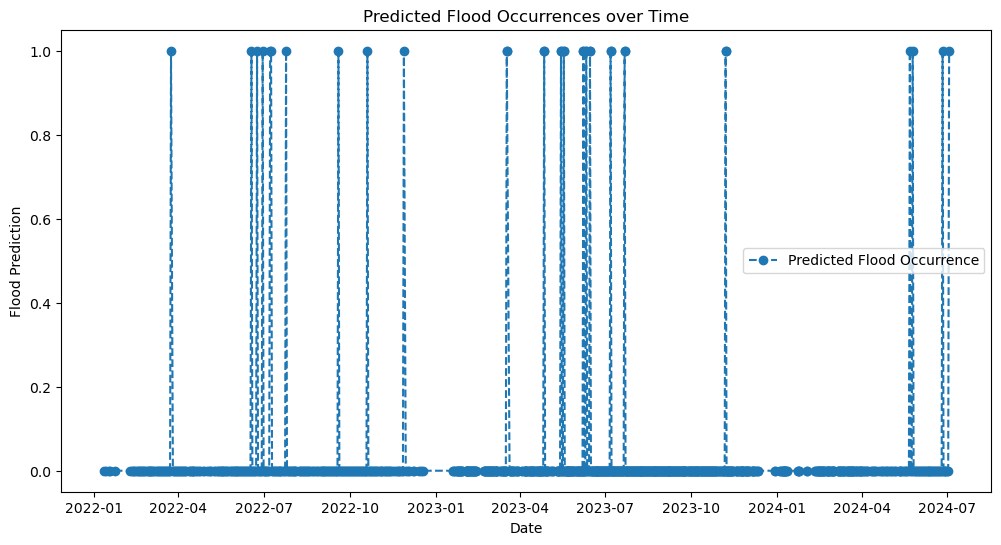

In [33]:
# Plot predicted flood occurrences
plt.figure(figsize=(12, 6))
plt.plot(data['datetime'], data['Flood_Prediction'], label='Predicted Flood Occurrence', linestyle='--', marker='o')
plt.xlabel('Date')
plt.ylabel('Flood Prediction')
plt.title('Predicted Flood Occurrences over Time')
plt.legend()
plt.show()


In [38]:
import pandas as pd

# Assuming you want to predict for the next 30 days
future_dates = pd.date_range(start='2024-07-04', periods=30)

# Create a DataFrame for future predictions
future_data = pd.DataFrame({'datetime': future_dates})

# Add other relevant columns with hypothetical values
# Example:
future_data['Precip'] = 6.76  # Example hypothetical value
future_data['Sealevelpressure'] = 1012.13  # Example hypothetical value
future_data['Windspeed'] = 26.24  # Example hypothetical value
future_data['river discharge'] = 293.63  # Example hypothetical value
future_data['day'] = 15.82
future_data['month'] = 6.22
future_data['year'] = 2023.0
future_data['Tempmax'] = 31.57
future_data['Tempmin'] = 24.43
future_data['Temp'] = 27.65
future_data['Humidity'] = 83.46
future_data['Precip'] = 6.76
future_data['Preciprob'] = 66.06
future_data['Precipcover'] = 5.88
future_data['Winddir'] = 212.55
future_data['Cloudcover'] = 57.48
future_data['Severrisk'] = 46.76
future_data['Moonphase'] = 0.48

# Ensure all necessary columns are present and in the right format
# Example: future_data = future_data[['datetime', 'Precip', 'Sealevelpressure', 'Windspeed', 'river discharge']]


In [44]:
# Predict the likelihood of future floods
future_predictions = model.predict(future_data[['river discharge', 'day', 'month', 'year', 'Tempmax', 'Tempmin', 'Temp', 
                'Humidity', 'Precip', 'Preciprob', 'Precipcover', 'Windspeed', 'Winddir', 'Sealevelpressure', 'Cloudcover', 'Severrisk', 'Moonphase']])


# Add predictions to the future_data DataFrame
future_data['Flood_Prediction'] = future_predictions

# Display the predicted dates of future floods
print(future_data[['datetime', 'Flood_Prediction']])


     datetime  Flood_Prediction
0  2024-07-04                 0
1  2024-07-05                 0
2  2024-07-06                 0
3  2024-07-07                 0
4  2024-07-08                 0
5  2024-07-09                 0
6  2024-07-10                 0
7  2024-07-11                 0
8  2024-07-12                 0
9  2024-07-13                 0
10 2024-07-14                 0
11 2024-07-15                 0
12 2024-07-16                 0
13 2024-07-17                 0
14 2024-07-18                 0
15 2024-07-19                 0
16 2024-07-20                 0
17 2024-07-21                 0
18 2024-07-22                 0
19 2024-07-23                 0
20 2024-07-24                 0
21 2024-07-25                 0
22 2024-07-26                 0
23 2024-07-27                 0
24 2024-07-28                 0
25 2024-07-29                 0
26 2024-07-30                 0
27 2024-07-31                 0
28 2024-08-01                 0
29 2024-08-02                 0
